In [12]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score 

In [15]:
glass=pd.read_csv("C:\\Users\\91938\\Desktop\\scriptsLecture\\section10\\glassClass.csv")
glass.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [16]:
le=LabelEncoder()
le.fit(glass['Type'])
print(list(le.classes_))
glass['Type']=le.transform(glass['Type'])

[1, 2, 3, 5, 6, 7]


In [17]:
X=glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
g_matrix=pd.DataFrame.as_matrix(X)

C:\Users\91938\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [18]:
cluster_model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [19]:
cluster_labels=cluster_model.fit_predict(g_matrix)

In [20]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
glass['pred']=cluster_labels

In [22]:
glass.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0,1


In [23]:
sm.accuracy_score(glass.Type,cluster_model.labels_)

0.3037383177570093

In [24]:
from sklearn import metrics

In [25]:
metrics.adjusted_rand_score(glass.Type,cluster_model.labels_)

0.23207987402252414

<IPython.core.display.Javascript object>


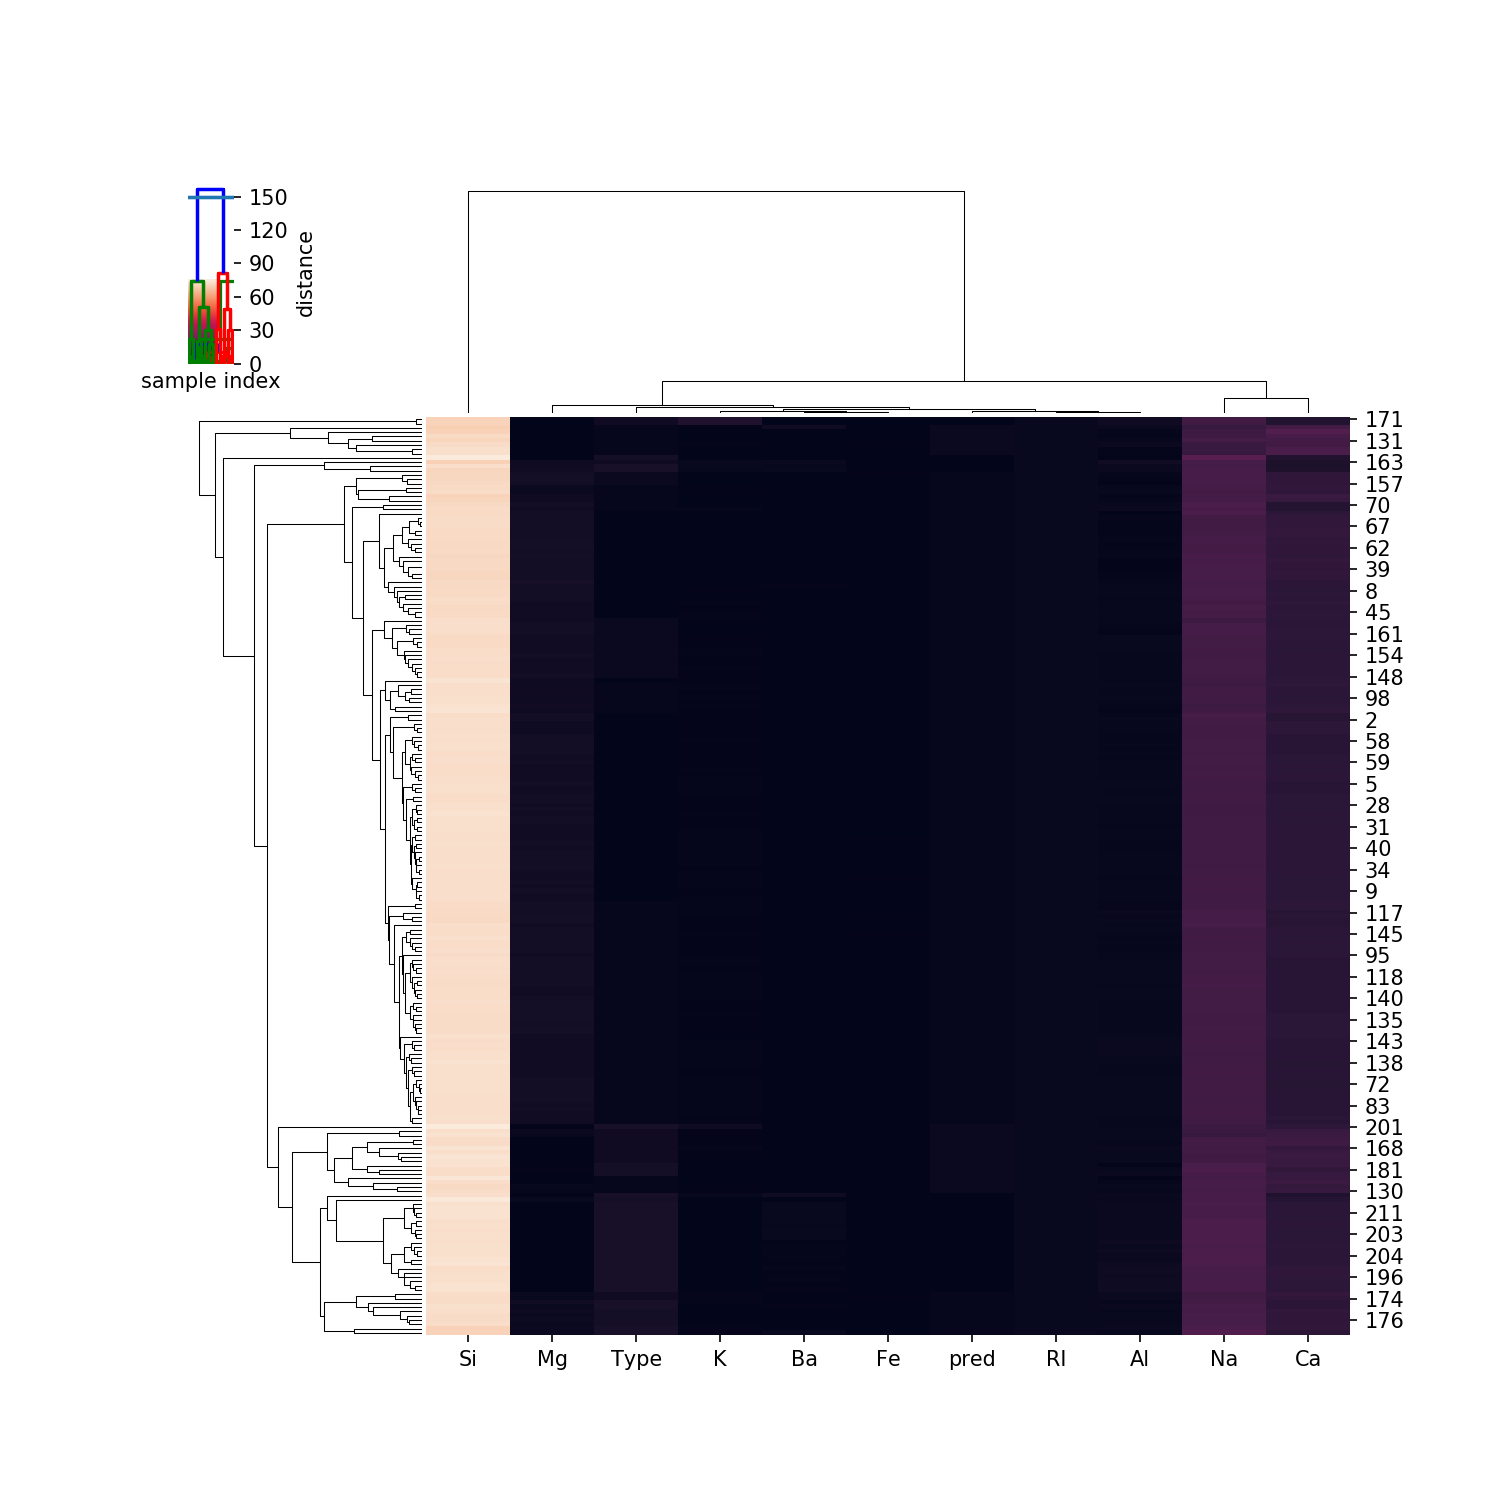

In [26]:
cg=sns.clustermap(glass)
plt.show()

<IPython.core.display.Javascript object>


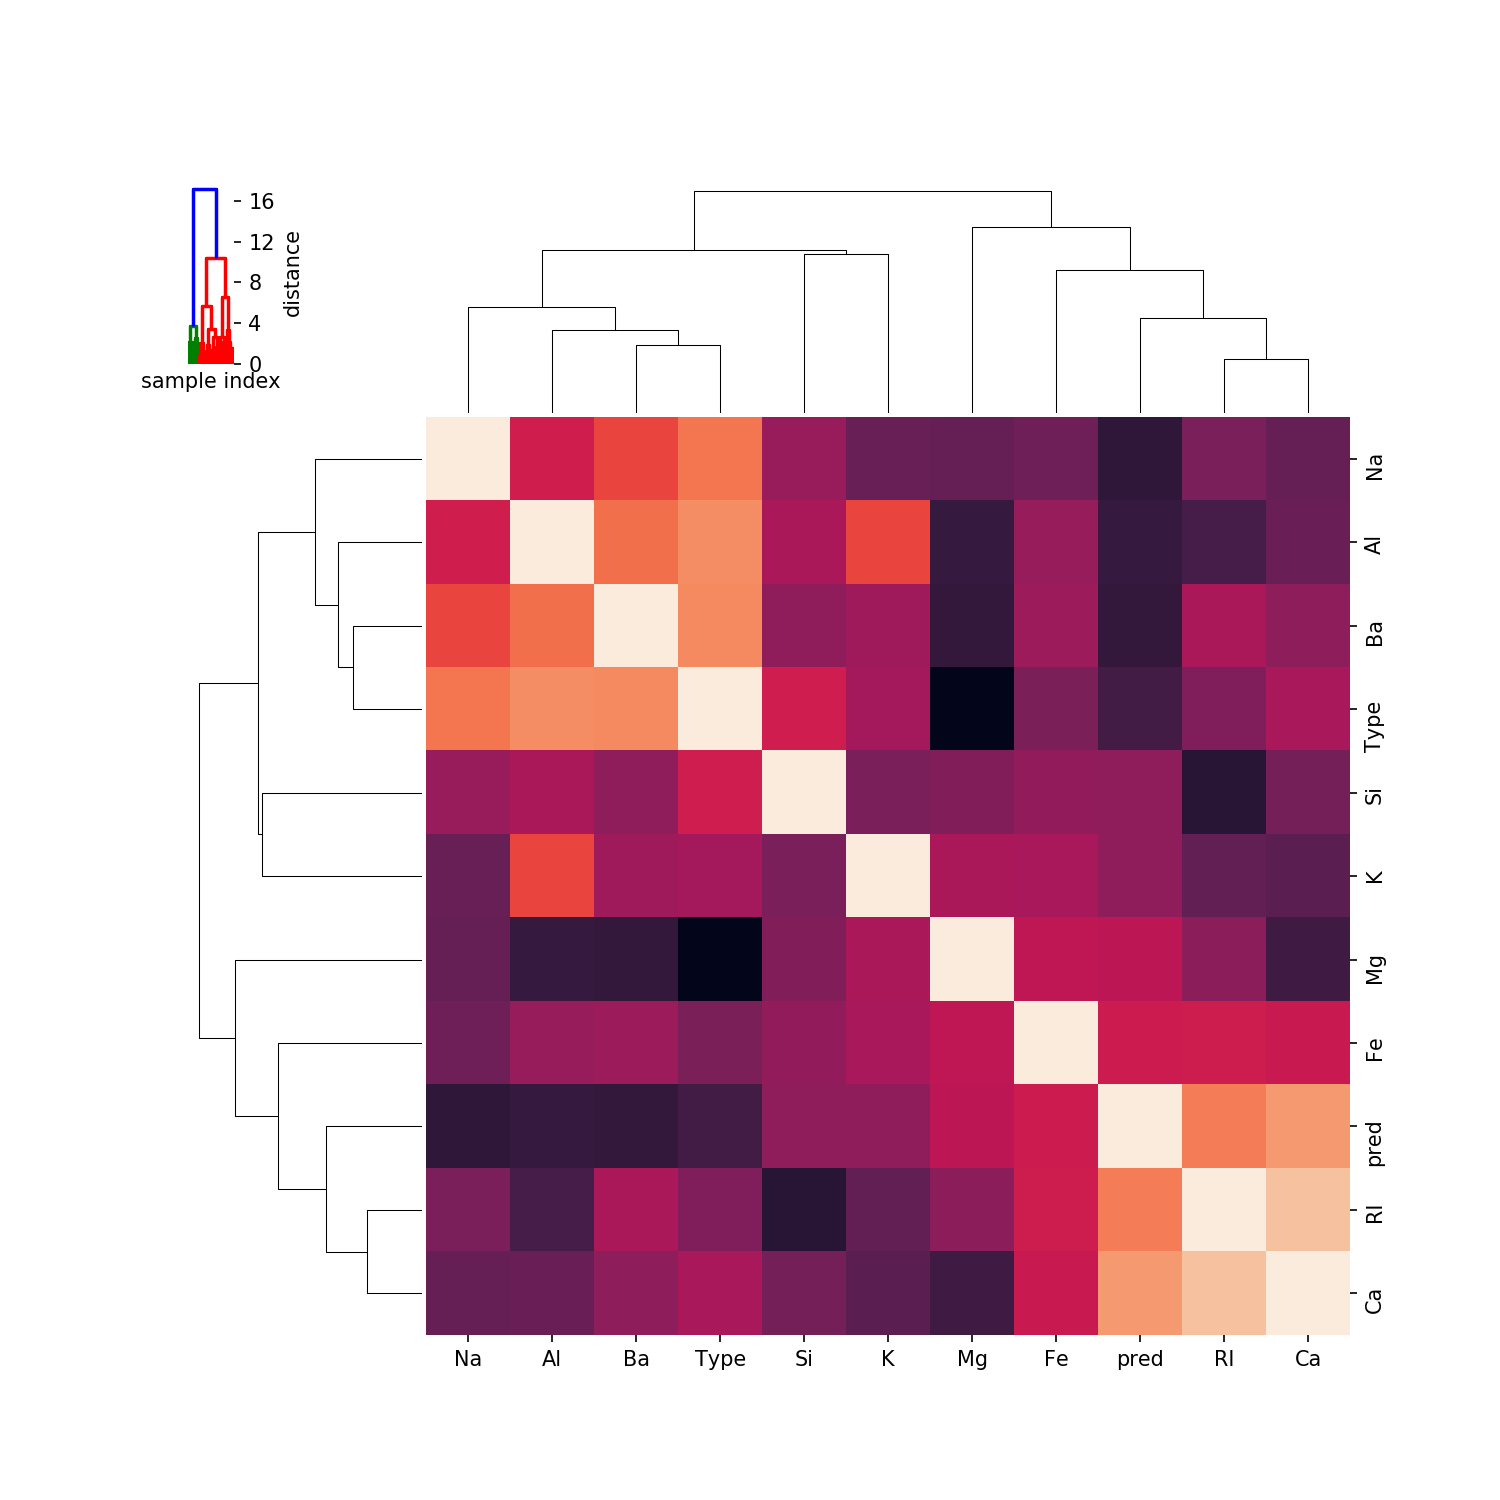

In [56]:
cg=sns.clustermap(glass.corr())
plt.show()

In [46]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [47]:
happy=pd.read_csv("C:\\Users\\91938\\Desktop\\scriptsLecture\\section10\\happy2015.csv")
happy.head(6)

,Country,Region,Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [48]:
x1=happy[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)',
          'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
x1.head(5)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [49]:
z=linkage(x1,'ward')

In [50]:
dendrogram(z,leaf_rotation=90.,leaf_font_size=8.,)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [51]:
dendrogram(z,truncate_mode='lastp' ,p=12,leaf_rotation=90. ,
          leaf_font_size=8.,show_contracted=True,)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [52]:
from scipy.spatial.distance import pdist

In [53]:
x2=happy[['Rank','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)',
          'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
x2.head(5)

,Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [54]:
z=linkage(x2,method='complete')

In [55]:
dendrogram(z,truncate_mode='lastp',p=12,
         leaf_rotation=45.,
          leaf_font_size=8.,show_contracted=True,)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [56]:
distanceMatrix=pdist(x2)
dend=dendrogram(linkage(distanceMatrix,method='complete'),truncate_mode='lastp',p=12, leaf_font_size=8.,
               labels=x2.Rank.tolist())

In [57]:
from scipy.cluster.hierarchy import fcluster

In [58]:
assignments=fcluster(linkage(distanceMatrix,method='complete'),4,'distance')

In [60]:
cluster_output=pd.DataFrame({'Rank':x2.Rank.tolist(),'cluster':assignments})

In [61]:
cluster_output.head(5)

,Rank,cluster
0,1,48
1,2,48
2,3,48
3,4,48
4,5,50


In [62]:
new=pd.merge(cluster_output,happy,on='Rank')

In [63]:
new.head(6)

,Rank,cluster,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,48,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,48,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,48,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,48,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,50,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,6,50,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
